## 1. 设有方程$f(x)=x^2+\sin(10x)-1=0$，先作出函数$y=f(x)$的图形，观察方程的有根区间，构造收敛的迭代格式并编程求出$f(x)=0$的所有根。

### 解：先估计有根区间的可能范围并画图。采用牛顿法求解,输入：函数，区间，误差,最大迭代次数；返回根。

In [18]:
using Plots
using Zygote

x=collect(-3:0.1:3)
ϵ=1e-3
max_iter=100
function f(x)
    return x^2+sin(10*x)-1
end

f (generic function with 1 method)

In [29]:
function NewtonSolver(f,a,b,ϵ,max_iter)
    xn=(a+b)/2
    for i=1:max_iter
        xn_plus=xn-f(xn)/f'(xn)
        if abs(xn_plus-xn)<ϵ
            return xn_plus
        else
            xn=xn_plus
        end
    end
    return xn_plus,abs(xn_plus-xn)
end

NewtonSolver (generic function with 1 method)

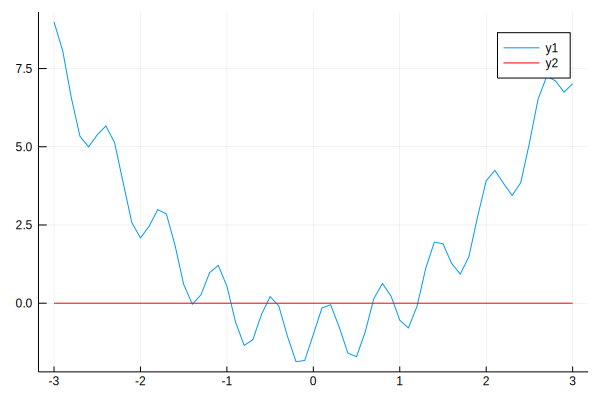

In [8]:
x=collect(-3:0.1:3)
plot(x,f.(x))
plot!(x,x.*0, color= :red)

## 放大局部区域，明确具体有根区间，经可视化后，共发现如下有根区间

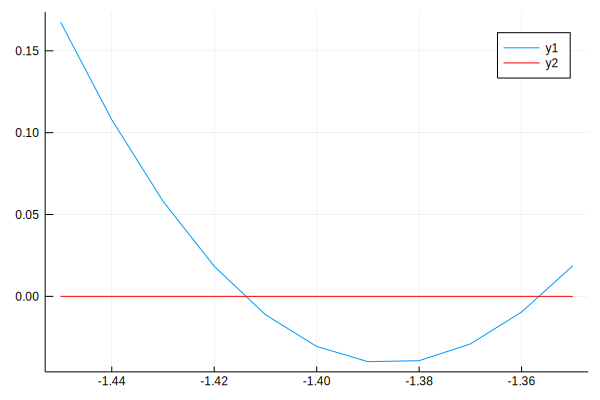

In [21]:
x=collect(-1.45:0.01:-1.35)
plot(x,f.(x))
plot!(x,x.*0, color= :red)

### 此处的解为

In [30]:
NewtonSolver(f,-1.42,-1.40,ϵ,max_iter),NewtonSolver(f,-1.37,-1.35,ϵ,max_iter)

(-1.4142116544054055, -1.356263932727878)

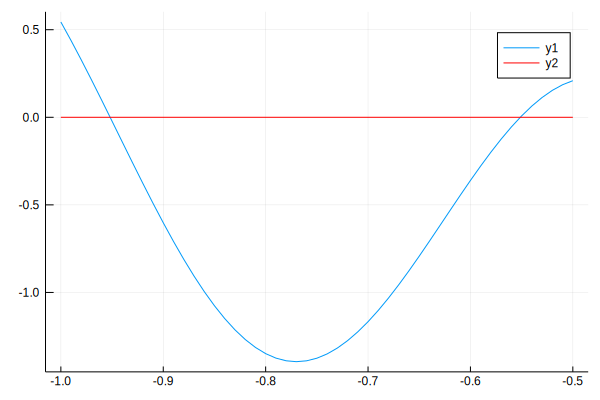

In [13]:
x=collect(-1:0.01:-0.5)
plot(x,f.(x))
plot!(x,x.*0, color= :red)

### 此处的解为

In [31]:
NewtonSolver(f,-1,-0.8,ϵ,max_iter),NewtonSolver(f,-0.7,-0.5,ϵ,max_iter)

(-0.9518834481104756, -0.5513330591269682)

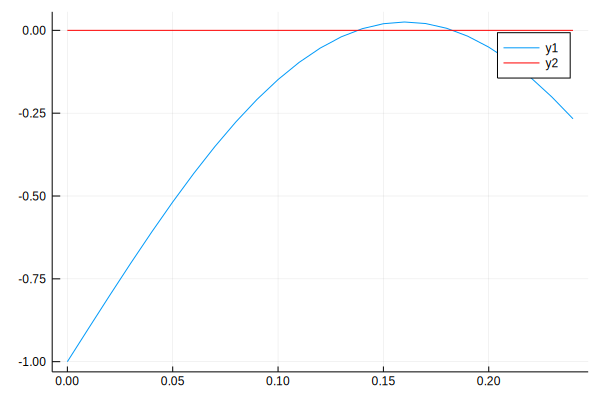

In [33]:
x=collect(0:0.01:0.24)
plot(x,f.(x))
plot!(x,x.*0, color= :red)

### 此处的解为

In [34]:
NewtonSolver(f,0.1,0.15,ϵ,max_iter),NewtonSolver(f,0.15,0.2,ϵ,max_iter)

(0.13759036504312702, 0.18303810403322043)

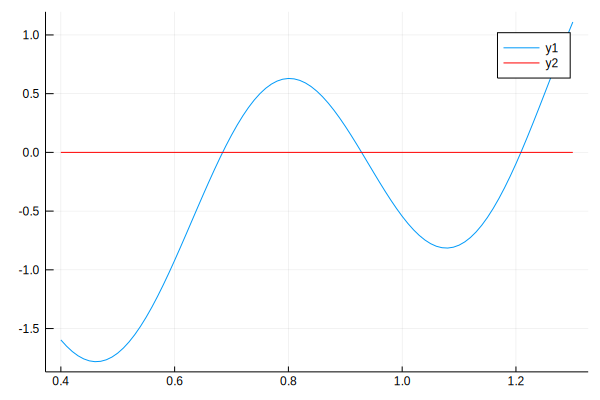

In [37]:
x=collect(0.4:0.01:1.3)
plot(x,f.(x))
plot!(x,x.*0, color= :red)

### 此处的解为

In [38]:
NewtonSolver(f,0.6,0.8,ϵ,max_iter),NewtonSolver(f,0.8,1.0,ϵ,max_iter),NewtonSolver(f,1.1,1.5,ϵ,max_iter)

(0.6843698717374427, 0.9286783992190386, 1.208723484433428)

### 综上，求得共九解，-1.4142116544054055, -1.356263932727878，-0.9518834481104756, -0.551333059126968，0.13759036504312702, 0.18303810403322043， 0.6843698717374427, 0.9286783992190386, 1.208723484433428

## 1. 求方程$x=e^{-x}$在$x=0.5$附近的根，按如下要求编程，求方程的近似解，精确到$10^{-8}$
### (1) 取$\psi(x)=e^{-x}$，用简单迭代法$x_{n+1}=\psi(x_n)$
### (2) 用加速收敛的迭代格式$x_{n+1}=\lambda\psi(x_n)+(1-\lambda)x_n,\lambda=0.625$计算

### 代码如下

In [51]:
ψ(x)=exp(-x)
x0=0.5
ε=0.5*1e-8
max_iter=1000
λ=0.625

function NaivSolver(f,x0,ϵ,max_iter)
    xn=copy(x0)
    for i=1:max_iter
        xn_plus=f(xn)
        if abs(xn_plus-xn)<ϵ
            println("迭代次数：",i,"当前值：", xn," 迭代成功")
            return xn_plus
        else
            xn=xn_plus
            println("迭代次数：",i,"当前值：", xn)
        end
    end
    return xn_plus,abs(xn_plus-xn)
end

function AcceSolver(f,x0,λ,ϵ,max_iter)
    xn=copy(x0)
    for i=1:max_iter
        xn_plus=λ*f(xn)+(1-λ)*xn
        if abs(xn_plus-xn)<ϵ
            println("迭代次数：",i,"当前值：", xn," 迭代成功")
            return xn_plus
        else
            xn=xn_plus
            println("迭代次数：",i,"当前值：", xn)
        end
    end
    return xn_plus,abs(xn_plus-xn)
end

AcceSolver (generic function with 1 method)

In [50]:
NaivSolver(ψ,x0,ε,max_iter)

迭代次数：1当前值：0.6065306597126334
迭代次数：2当前值：0.545239211892605
迭代次数：3当前值：0.5797030948780683
迭代次数：4当前值：0.5600646279389019
迭代次数：5当前值：0.5711721489772151
迭代次数：6当前值：0.5648629469803235
迭代次数：7当前值：0.5684380475700662
迭代次数：8当前值：0.5664094527469208
迭代次数：9当前值：0.5675596342622424
迭代次数：10当前值：0.5669072129354714
迭代次数：11当前值：0.5672771959707785
迭代次数：12当前值：0.5670673518537281
迭代次数：13当前值：0.5671863600876381
迭代次数：14当前值：0.5671188642569858
迭代次数：15当前值：0.5671571437076446
迭代次数：16当前值：0.5671354336592732
迭代次数：17当前值：0.5671477463306249
迭代次数：18当前值：0.5671407632698067
迭代次数：19当前值：0.5671447236620769
迭代次数：20当前值：0.5671424775509449
迭代次数：21当前值：0.5671437514174078
迭代次数：22当前值：0.5671430289524634
迭代次数：23当前值：0.5671434386935683
迭代次数：24当前值：0.5671432063116367
迭代次数：25当前值：0.5671433381054858
迭代次数：26当前值：0.5671432633594872
迭代次数：27当前值：0.5671433057511783
迭代次数：28当前值：0.567143281709015
迭代次数：29当前值：0.5671432953443666
迭代次数：30当前值：0.5671432876111684
迭代次数：31当前值：0.5671432876111684 迭代成功


0.5671432919969999

In [52]:
AcceSolver(ψ,x0,λ,ϵ,max_iter)

迭代次数：1当前值：0.5665816623203959
迭代次数：2当前值：0.5665816623203959 迭代成功


0.5671318130420451

### 可见本例中加速迭代收敛远快于简单迭代